# IMPORTS

In [1]:
import wrangle
import explore
import evaluate
import pandas as pd
import seaborn as sns
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
import warnings
warnings.filterwarnings('ignore')

# ACQUIRE/PREP and PREVIEW

In [2]:
df = wrangle.new_zillow_data()

In [3]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips,yearbuilt,taxvaluedollarcnt
0,4.0,3.5,3100.0,6059.0,1998.0,1023282.0
1,2.0,1.0,1465.0,6111.0,1967.0,464000.0
2,3.0,2.0,1243.0,6059.0,1962.0,564778.0
3,4.0,3.0,2376.0,6037.0,1970.0,145143.0
4,4.0,3.0,2962.0,6037.0,1950.0,773303.0
...,...,...,...,...,...,...
52437,2.0,2.0,1286.0,6037.0,1940.0,354621.0
52438,4.0,2.0,1612.0,6111.0,1964.0,67205.0
52439,3.0,1.0,1032.0,6037.0,1954.0,49546.0
52440,3.0,2.0,1762.0,6037.0,1955.0,522000.0


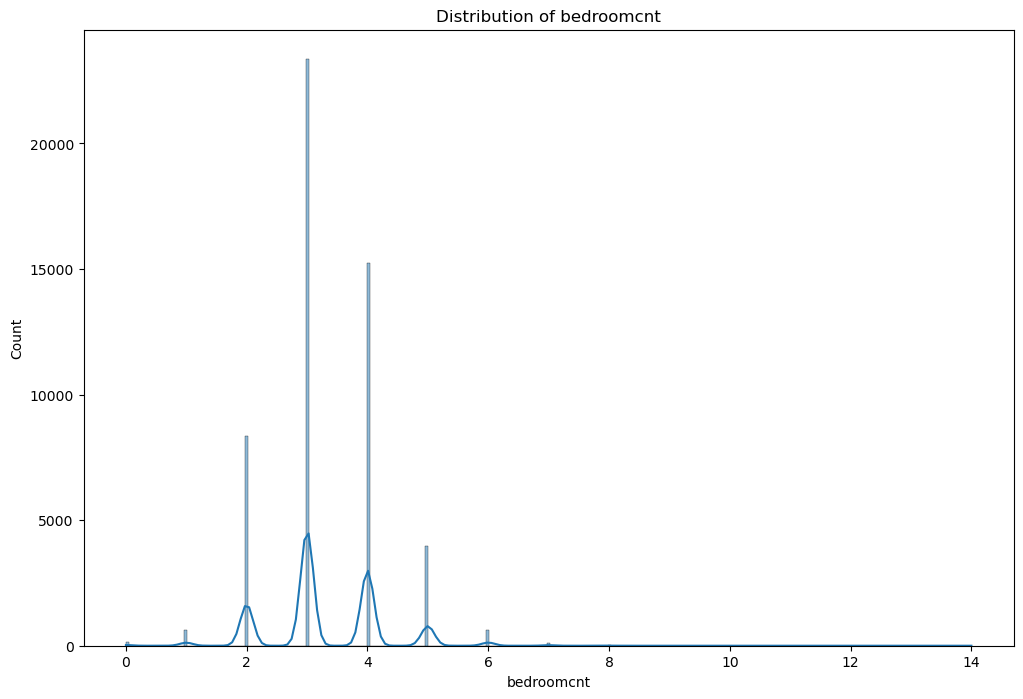

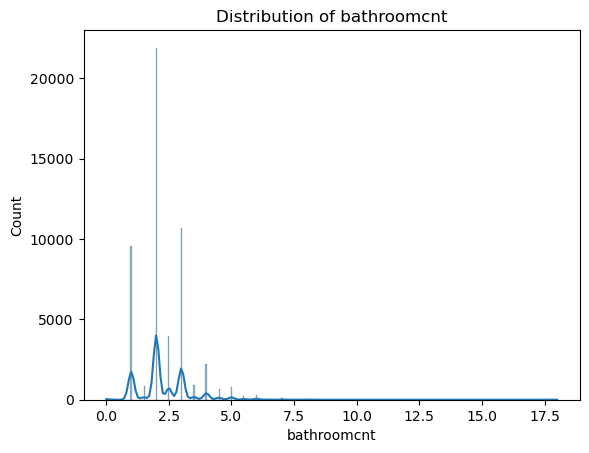

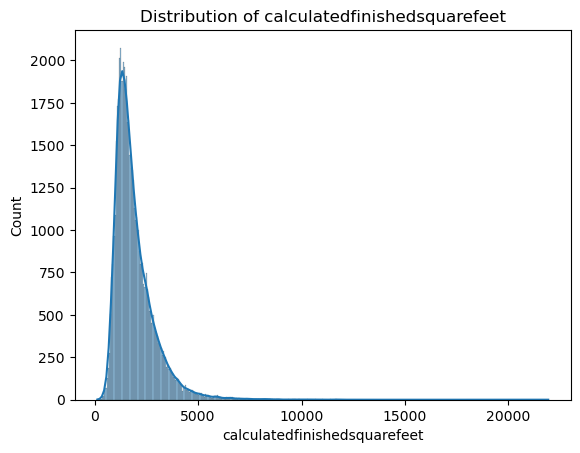

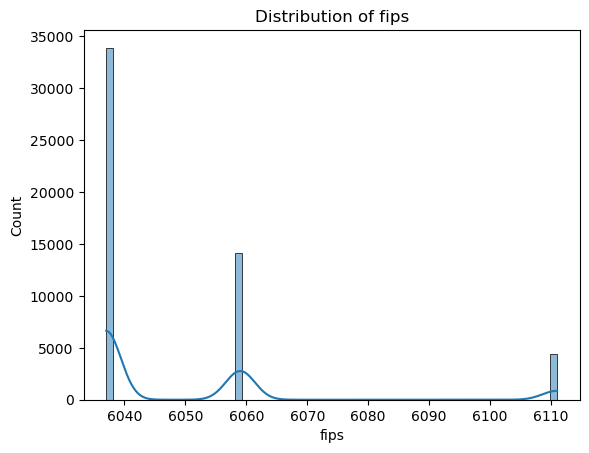

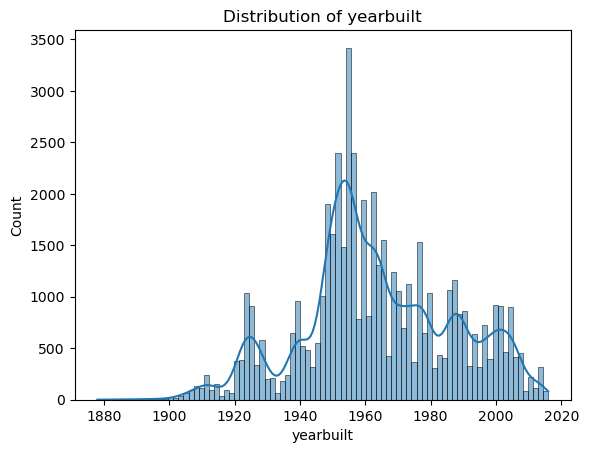

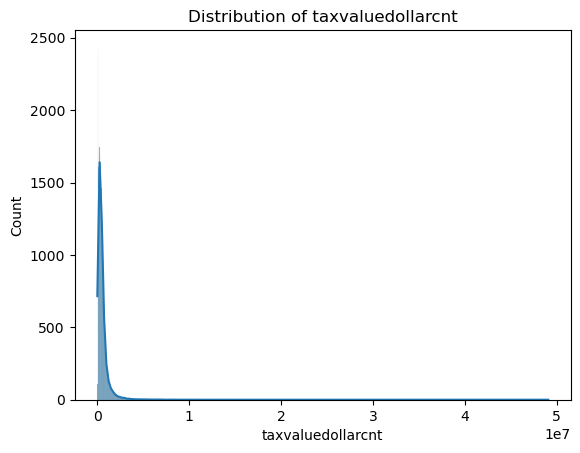

In [4]:
plt.figure(figsize=(12, 8))


for column in df.columns:
    
    sns.histplot(data=df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

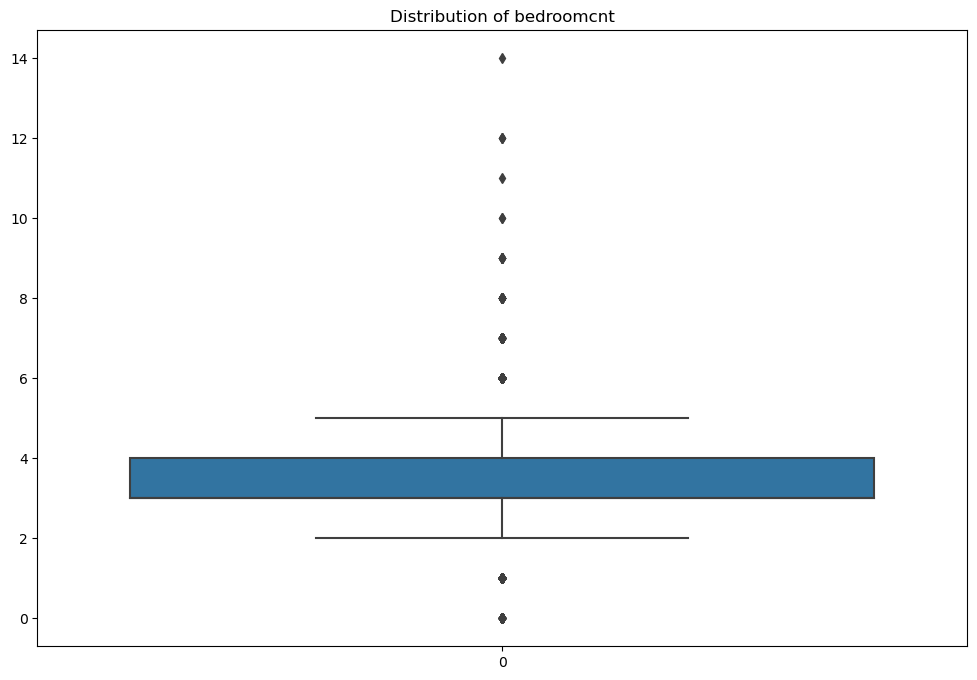

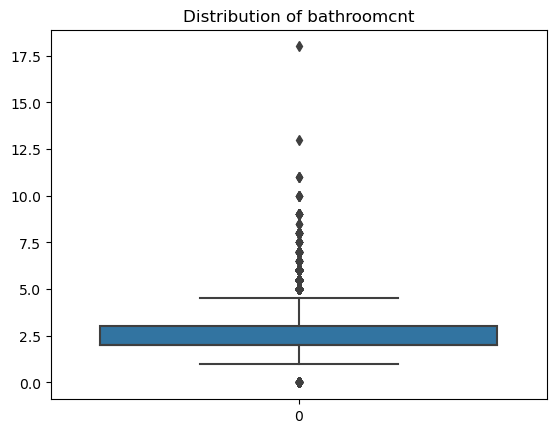

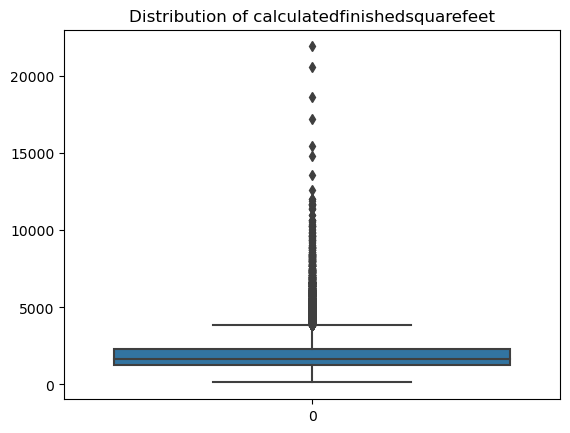

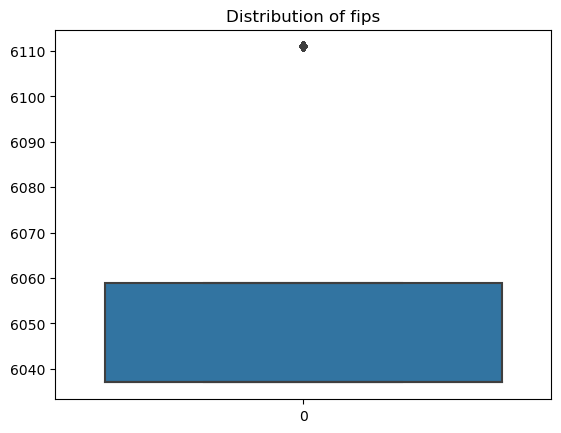

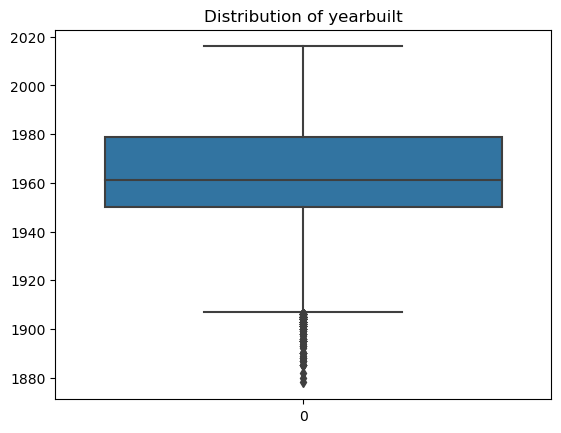

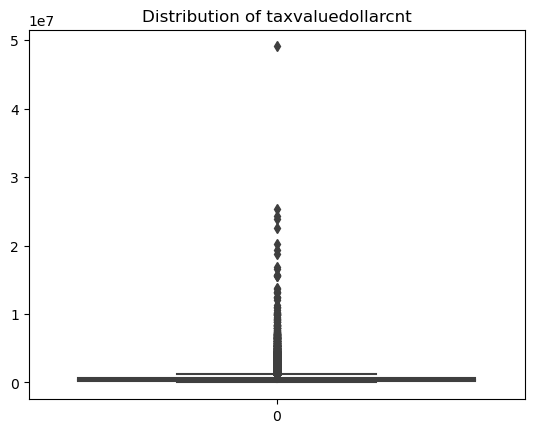

In [5]:
plt.figure(figsize=(12, 8))


for column in df.columns:
    
    sns.boxplot(data=df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [6]:
df.taxvaluedollarcnt.max()

49061236.0

In [7]:
train, validate, test = wrangle.wrangle_zillow()

In [8]:
train

,bedroom_count,bathroom_count,calc_sqr_feet,county_code,yearbuilt,tax_value,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
52422,3.0,3.0,1774.0,6037.0,1949.0,796324.0,1,0,0
37841,3.0,2.0,1575.0,6037.0,1977.0,138035.0,1,0,0
31409,4.0,2.0,1918.0,6059.0,1952.0,521000.0,0,1,0
3753,3.0,2.0,967.0,6037.0,1952.0,428000.0,1,0,0
24421,3.0,2.5,1281.0,6059.0,1983.0,257831.0,0,1,0
...,...,...,...,...,...,...,...,...,...
40152,5.0,3.0,2849.0,6059.0,1964.0,124649.0,0,1,0
13339,4.0,2.0,2046.0,6111.0,1984.0,274330.0,0,0,1
35461,4.0,3.0,2028.0,6037.0,1965.0,224169.0,1,0,0
44530,3.0,2.0,1327.0,6037.0,1957.0,492000.0,1,0,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20001 entries, 52422 to 6533
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bedroom_count          20001 non-null  float64
 1   bathroom_count         20001 non-null  float64
 2   calc_sqr_feet          20001 non-null  float64
 3   county_code            20001 non-null  float64
 4   yearbuilt              20001 non-null  float64
 5   tax_value              20001 non-null  float64
 6   is_county_code_6037.0  20001 non-null  uint8  
 7   is_county_code_6059.0  20001 non-null  uint8  
 8   is_county_code_6111.0  20001 non-null  uint8  
dtypes: float64(6), uint8(3)
memory usage: 1.1 MB


In [10]:
df = train

In [11]:
df.columns


Index(['bedroom_count', 'bathroom_count', 'calc_sqr_feet', 'county_code',
       'yearbuilt', 'tax_value', 'is_county_code_6037.0',
       'is_county_code_6059.0', 'is_county_code_6111.0'],
      dtype='object')

In [12]:
df.shape

(20001, 9)

In [13]:
df.dtypes

bedroom_count            float64
bathroom_count           float64
calc_sqr_feet            float64
county_code              float64
yearbuilt                float64
tax_value                float64
is_county_code_6037.0      uint8
is_county_code_6059.0      uint8
is_county_code_6111.0      uint8
dtype: object

In [14]:
print('max home value is',train.tax_value.max(), 'and minimum home value is' ,train.tax_value.min())

max home value is 5000000.0 and minimum home value is 50001.0


In [15]:
train.describe()

,bedroom_count,bathroom_count,calc_sqr_feet,county_code,yearbuilt,tax_value,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,2.000100e+04,20001.000000,20001.000000,20001.000000
mean,3.554422,2.485126,2007.005850,6050.757212,1968.529024,4.981890e+05,0.606770,0.295035,0.098195
std,0.637613,0.594614,684.713377,22.164770,20.592003,4.338768e+05,0.488479,0.456070,0.297586
min,3.000000,2.000000,676.000000,6037.000000,1900.000000,5.000100e+04,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1479.000000,6037.000000,1955.000000,2.227410e+05,0.000000,0.000000,0.000000
50%,3.000000,2.000000,1849.000000,6037.000000,1965.000000,4.080000e+05,1.000000,0.000000,0.000000
75%,4.000000,3.000000,2404.000000,6059.000000,1984.000000,6.358000e+05,1.000000,1.000000,0.000000
max,5.000000,4.000000,4997.000000,6111.000000,2016.000000,5.000000e+06,1.000000,1.000000,1.000000


# Explore

In [16]:
train.nunique()

bedroom_count                3
bathroom_count               5
calc_sqr_feet             2944
county_code                  3
yearbuilt                  117
tax_value                16720
is_county_code_6037.0        2
is_county_code_6059.0        2
is_county_code_6111.0        2
dtype: int64

In [17]:
columns = train.select_dtypes(include='number')

range_of_columns = columns.max() - columns.min()
range_of_columns

bedroom_count                  2.0
bathroom_count                 2.0
calc_sqr_feet               4321.0
county_code                   74.0
yearbuilt                    116.0
tax_value                4949999.0
is_county_code_6037.0          1.0
is_county_code_6059.0          1.0
is_county_code_6111.0          1.0
dtype: float64

In [18]:
for column in train.columns:

    statistics = train[column].describe()
    print(f'Descriptive Statistics of {column}:\n{statistics}\n')

Descriptive Statistics of bedroom_count:
count    20001.000000
mean         3.554422
std          0.637613
min          3.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedroom_count, dtype: float64

Descriptive Statistics of bathroom_count:
count    20001.000000
mean         2.485126
std          0.594614
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: bathroom_count, dtype: float64

Descriptive Statistics of calc_sqr_feet:
count    20001.000000
mean      2007.005850
std        684.713377
min        676.000000
25%       1479.000000
50%       1849.000000
75%       2404.000000
max       4997.000000
Name: calc_sqr_feet, dtype: float64

Descriptive Statistics of county_code:
count    20001.000000
mean      6050.757212
std         22.164770
min       6037.000000
25%       6037.000000
50%       6037.000000
75%       6059.000000
max       6111.000000
Name: county_code, dt

In [19]:
# explore.plot_variable_pairs(df)

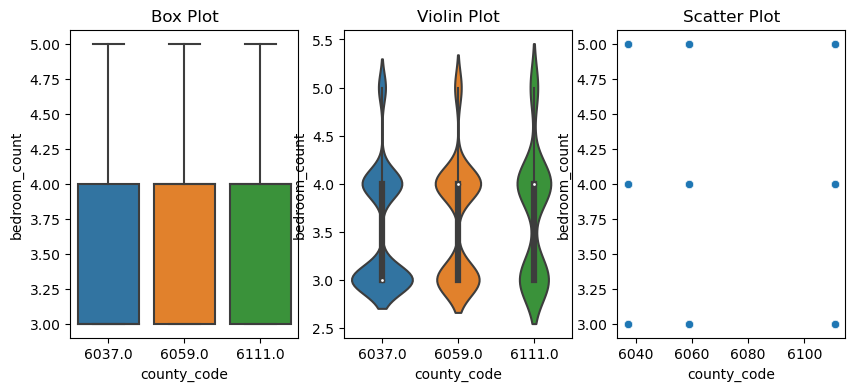

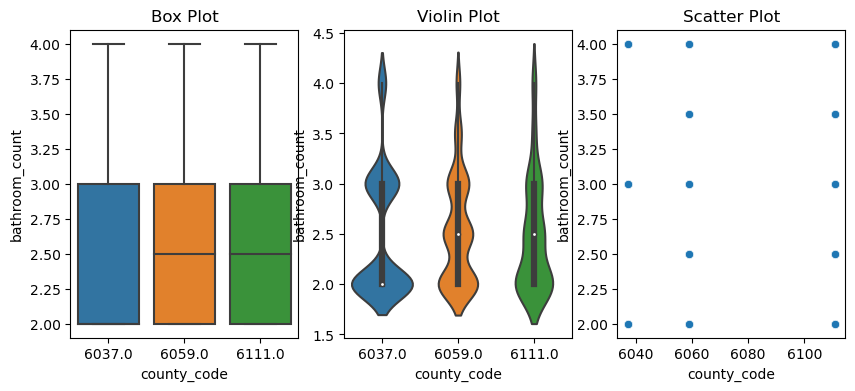

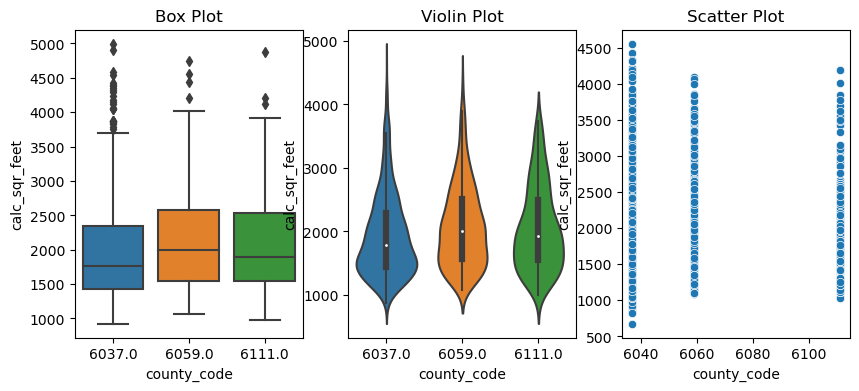

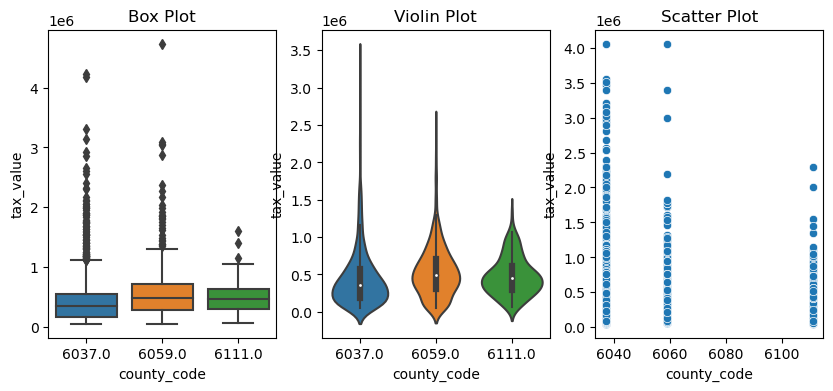

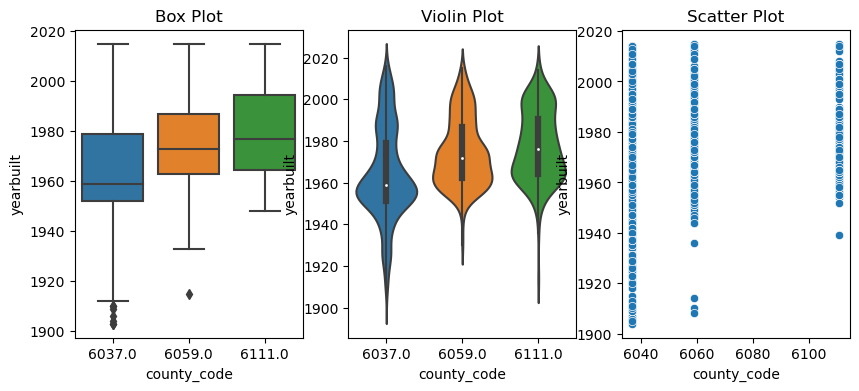

In [20]:
explore.plot_categorical_and_continuous_vars(df)

6059 = 	Orange County, CA

6037 =	Los Angeles County, CA

6111 =	Ventura County, CA

### independent vs dependent

In [21]:

independent_vars = ['bedroom_count', 'bathroom_count', 'yearbuilt', 'calc_sqr_feet']

dependent_var = 'tax_value'

correlation_matrix = pd.DataFrame(index=independent_vars, columns=['Pearson correlation'])

for var in independent_vars:
    corr, _ = pearsonr(df[var], df[dependent_var])
    correlation_matrix.loc[var, 'Pearson correlation tax_value'] = corr

print(correlation_matrix)

               Pearson correlation  Pearson correlation tax_value
bedroom_count                  NaN                       0.126001
bathroom_count                 NaN                       0.407573
yearbuilt                      NaN                       0.070731
calc_sqr_feet                  NaN                       0.483821


### independent vs independent

In [22]:
independent_vars = ['bedroom_count', 'bathroom_count', 'yearbuilt', 'calc_sqr_feet']
correlation_matrix = pd.DataFrame(index=independent_vars, columns=independent_vars)

for var1 in independent_vars:
    for var2 in independent_vars:
        if var1 != var2:
            corr, _ = pearsonr(df[var1], df[var2])
            correlation_matrix.loc[var1, var2] = corr


print(correlation_matrix)



               bedroom_count bathroom_count yearbuilt calc_sqr_feet
bedroom_count            NaN       0.423853   0.15223      0.470261
bathroom_count      0.423853            NaN  0.342939      0.749123
yearbuilt            0.15223       0.342939       NaN      0.345756
calc_sqr_feet       0.470261       0.749123  0.345756           NaN


Text(0.5, 1.0, 'Heat Plot')

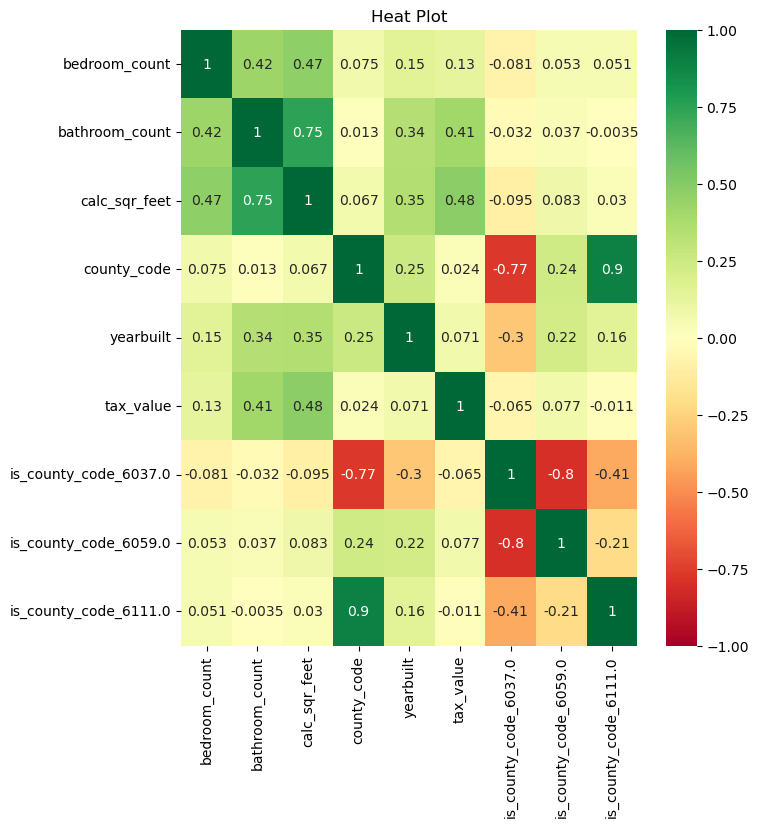

In [23]:
plt.figure(figsize=(25, 8))


plt.subplot(132)
sns.heatmap(df.corr(), cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True)
plt.title('Heat Plot')


Text(0.5, 1.0, 'Scatter Plot')

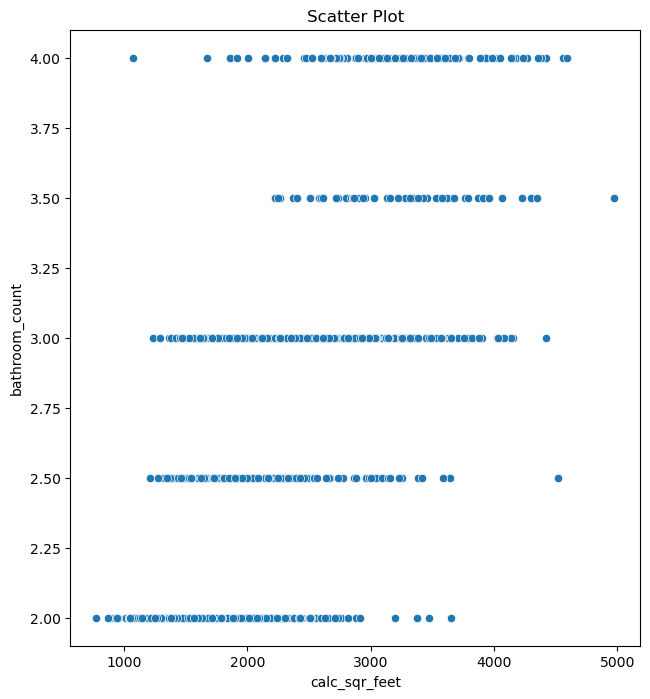

In [24]:
plt.figure(figsize=(25, 8))
plt.subplot(133)
sns.scatterplot(data = df.sample(frac = 0.10),x='calc_sqr_feet', y= 'bathroom_count')
plt.title('Scatter Plot')

In [25]:
df.corr()['tax_value'].to_frame()

,tax_value
bedroom_count,0.126001
bathroom_count,0.407573
calc_sqr_feet,0.483821
county_code,0.023769
yearbuilt,0.070731
tax_value,1.000000
is_county_code_6037.0,-0.065207
is_county_code_6059.0,0.077175
is_county_code_6111.0,-0.011240


Text(0.5, 1.0, 'Scatter Plot')

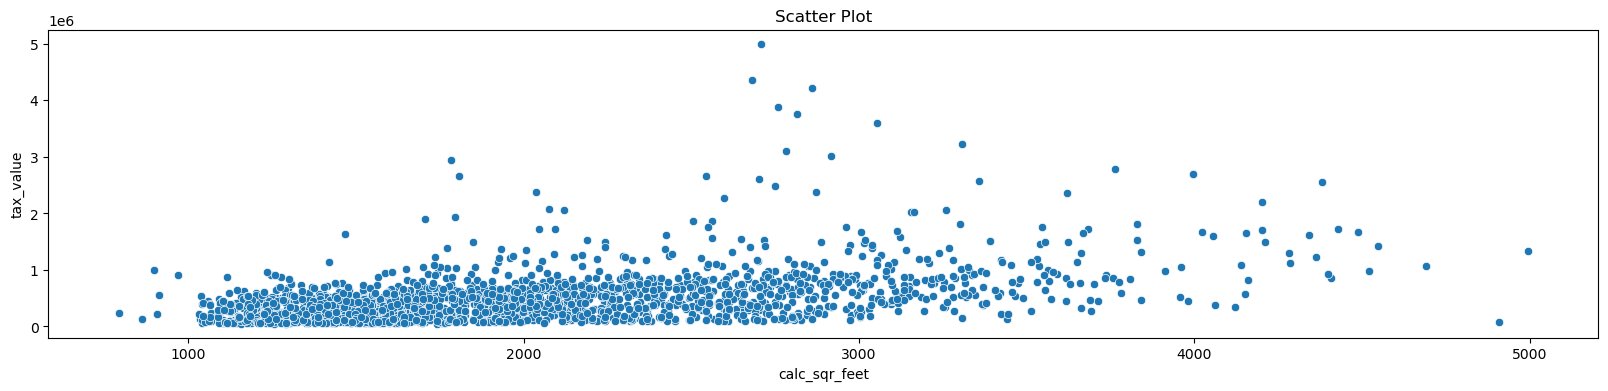

In [26]:
plt.figure(figsize=(20, 4))



sns.scatterplot(data = df.sample(frac = 0.10),x='calc_sqr_feet', y= 'tax_value')
plt.title('Scatter Plot')

# Modeling

In [27]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)

In [28]:
train_scaled.head()

,bedroom_count,bathroom_count,calc_sqr_feet,county_code,yearbuilt,tax_value,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
52422,0.0,0.50,0.254108,6037.0,0.422414,796324.0,1,0,0
37841,0.0,0.00,0.208054,6037.0,0.663793,138035.0,1,0,0
31409,0.5,0.00,0.287433,6059.0,0.448276,521000.0,0,1,0
3753,0.0,0.00,0.067346,6037.0,0.448276,428000.0,1,0,0
24421,0.0,0.25,0.140014,6059.0,0.715517,257831.0,0,1,0


In [29]:
print(f"""Train Shape: {train_scaled.shape}
Validate Shape: {validate_scaled.shape}
Test Shape: {test_scaled.shape}""")


Train Shape: (20001, 9)
Validate Shape: (8572, 9)
Test Shape: (7144, 9)


In [30]:
target = 'tax_value'
drop_col = ['county_code']

X_train = train_scaled.drop(columns=[target] + drop_col)
y_train = train_scaled[target]

X_validate = validate_scaled.drop(columns=[target] + drop_col)
y_validate = validate_scaled[target]

X_test = test_scaled.drop(columns=[target] + drop_col)
y_test = test_scaled[target]


### baseline

In [31]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [32]:
value_pred_mean = y_train.tax_value.mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

In [33]:
rmse_train_mu = mean_squared_error(y_train.tax_value, y_train.value_pred_mean) **.5

rmse_validate_mu = mean_squared_error(y_validate.tax_value, y_validate.value_pred_mean) **.5

print(f"""RMSE using Mean\nTrain/In-Sample: {round(rmse_train_mu, 2)} 
Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

RMSE using Mean
Train/In-Sample: 433865.92 
Validate/Out-of-Sample: 428222.25


In [34]:
df = pd.DataFrame(data=[
    {
        "model": "mean_baseline",
        "RMSE_train": rmse_train_mu,
        "RMSE_validate": rmse_validate_mu,
        "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_mean),
        "model difference": rmse_train_mu - rmse_validate_mu
                                          
    }
])


In [35]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,433865.919366,428222.247788,0.0,5643.671579


### LinearRegression (OLS)

In [36]:
# MAKE THE THING: create the model object
OLSmodel = LinearRegression()

#1. FIT THE THING: fit the model to training data

OLSmodel.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_ols'] = OLSmodel.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_ols) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_ols'] = OLSmodel.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_ols) ** .5

print(f"""RMSE for OLS
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for OLS
_____________________
Training/In-Sample: 369926.62756960193, 
Validation/Out-of-Sample:  364517.28498834395
Difference:  -5409.342581257981


In [37]:
df = df.append({
    "model": "OLS",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_ols),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)


In [38]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,433865.919366,428222.247788,0.00000,5643.671579
1,OLS,369926.627570,364517.284988,0.27538,5409.342581


### LassoLars

In [39]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha = 0.01)

#1. FIT THE THING: fit the model to training data

lars.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_lars'] = lars.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lars) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_lars'] = lars.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lars) ** .5

print(f"""RMSE for Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for Lars
_____________________
Training/In-Sample: 369926.65467580553, 
Validation/Out-of-Sample:  364515.697881736
Difference:  -5410.956794069556


In [40]:
df = df.append({
    "model": "LassoLars",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_lars),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)


In [41]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,433865.919366,428222.247788,0.000000,5643.671579
1,OLS,369926.627570,364517.284988,0.275380,5409.342581
2,LassoLars,369926.654676,364515.697882,0.275386,5410.956794


### TweedieRegressor (GLM:Generalized Linear Model)

In [42]:
# MAKE THE THING: create the model object
glm = TweedieRegressor(power = 2, alpha = 0.2)

glm.fit(X_train, y_train.tax_value)
#2. USE THE THING: make a prediction
y_train['value_pred_glm'] = glm.predict(X_train)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_glm) **.5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['value_pred_glm'] = glm.predict(X_validate)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_glm) ** .5

print(f"""RMSE for GLM
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

RMSE for GLM
_____________________
Training/In-Sample: 408563.8920319392, 
Validation/Out-of-Sample:  403213.8766946871
Difference:  -5350.015337252058


In [43]:
df = df.append({
    "model": "GLM",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_glm),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)

In [44]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,433865.919366,428222.247788,0.000000,5643.671579
1,OLS,369926.627570,364517.284988,0.275380,5409.342581
2,LassoLars,369926.654676,364515.697882,0.275386,5410.956794
3,GLM,408563.892032,403213.876695,0.114239,5350.015337


### Polynomial Regression

In [45]:
# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train.tax_value)

# Make predictions on training set
y_train['value_pred_poly'] = poly_reg.predict(X_train_poly)
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_poly) ** 0.5

# Make predictions on validation set
y_validate['value_pred_poly'] = poly_reg.predict(X_validate_poly)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_poly) ** 0.5

# Print the RMSE results
print(f"""RMSE for Polynomial Regression
_____________________
Training/In-Sample: {rmse_train},
Validation/Out-of-Sample: {rmse_validate}
Difference: {rmse_validate - rmse_train}""")


RMSE for Polynomial Regression
_____________________
Training/In-Sample: 359127.92897380923,
Validation/Out-of-Sample: 354205.7061804379
Difference: -4922.222793371358


In [46]:
df = df.append({
    "model": "POLY",
    "RMSE_train": rmse_train,
    "RMSE_validate": rmse_validate,
    "R_validate": explained_variance_score(y_validate.tax_value, y_validate.value_pred_poly),
    "model difference": rmse_train - rmse_validate
                                          
}, ignore_index=True)

In [47]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,433865.919366,428222.247788,0.000000,5643.671579
1,OLS,369926.627570,364517.284988,0.275380,5409.342581
2,LassoLars,369926.654676,364515.697882,0.275386,5410.956794
3,GLM,408563.892032,403213.876695,0.114239,5350.015337
4,POLY,359127.928974,354205.706180,0.315790,4922.222793


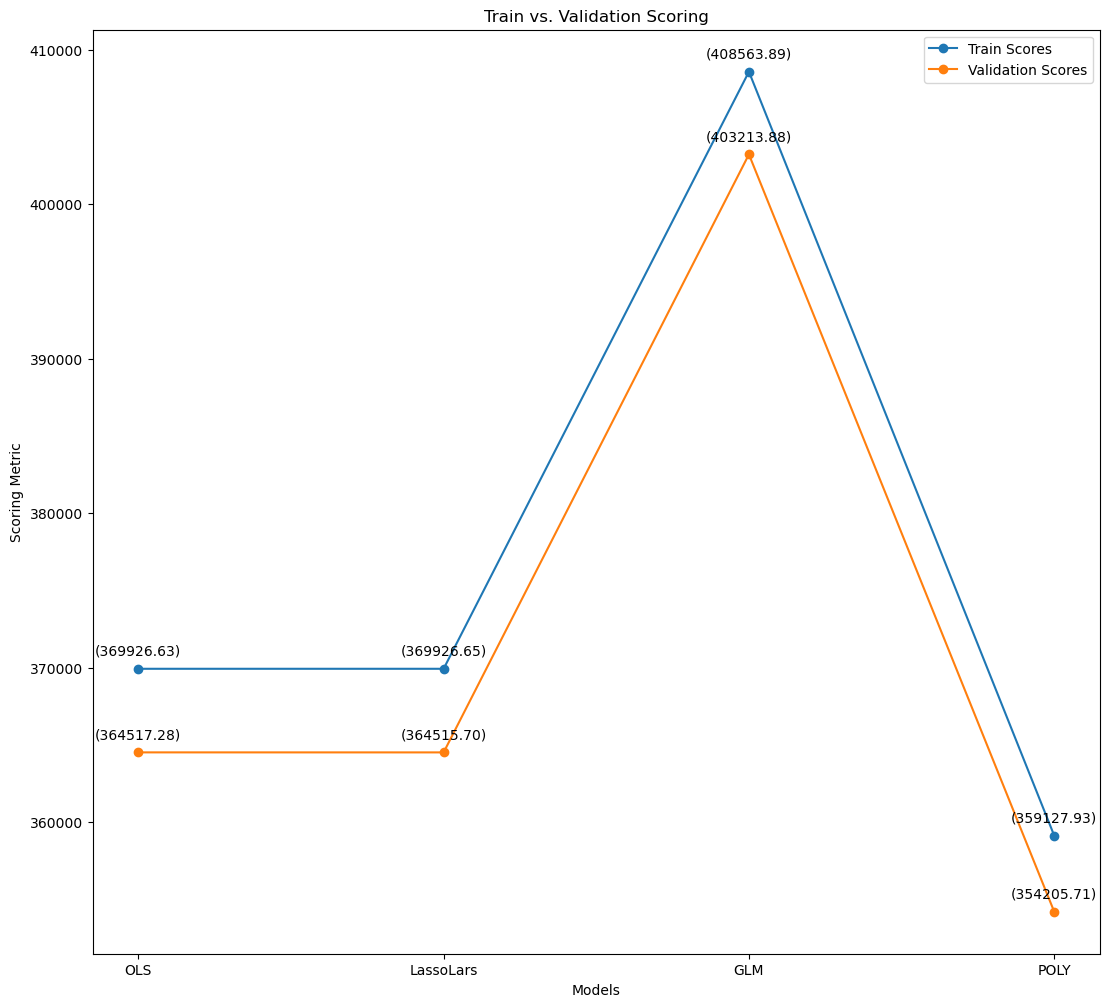

In [57]:

plt.figure(figsize= (13,12))
models = ['OLS', 'LassoLars', 'GLM','POLY']
train_scores = [369926.627570,369926.654676, 408563.892032, 359127.928974]
valid_scores = [364517.284988, 364515.697882,403213.876695,354205.706180]

plt.plot(models, train_scores, marker='o', label='Train Scores')
plt.plot(models, valid_scores, marker='o', label='Validation Scores')

plt.xlabel('Models')
plt.ylabel('Scoring Metric')
plt.title('Train vs. Validation Scoring')

for i, model in enumerate(models):
    plt.annotate(f"({train_scores[i]:.2f})", (model, train_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f"({valid_scores[i]:.2f})", (model, valid_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()

plt.show()


### Picking POLY as best performing model and running test on the model (due to best model difference and beating baseline test/val scoring

In [52]:
df

,model,RMSE_train,RMSE_validate,R_validate,model difference
0,mean_baseline,433865.919366,428222.247788,0.000000,5643.671579
1,OLS,369926.627570,364517.284988,0.275380,5409.342581
2,LassoLars,369926.654676,364515.697882,0.275386,5410.956794
3,GLM,408563.892032,403213.876695,0.114239,5350.015337
4,POLY,359127.928974,354205.706180,0.315790,4922.222793


In [53]:
X_test_poly = poly.transform(X_test)

y_test_pred = poly_reg.predict(X_test_poly)

rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5

print(f"RMSE on Test Set: {rmse_test}")



RMSE on Test Set: 357684.121153635


### RMSE on POLY Test Set is 358,000 which beats baselines RMSE train and RMSE validate by approximately 76,000 dollars less in error which equates to 18% error reduction